In [ ]:
%pip install geopandas

# Obtencion de divisiones comunales de Chile

Se obtiene la division comunal de Chile a traves del repositorio de division comular para ser cargado en GeoPandas

In [ ]:
#!wget https://www.bcn.cl/siit/obtienearchivo?id=repositorio/10221/10396/1/division_comunal.zip
#!mv obtienearchivo\?id\=repositorio%2F10221%2F10396%2F1%2Fdivision_comunal.zip comunal.zip
#!unzip comunal

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from google.cloud import bigquery
import seaborn as sns
import geopandas as gpd
import re

# Intancia de Cliente BigQuery

Crea la instancia del cliente BigQuery para ocupar directamente consultas y las proyecciones de estas a un dataframe ```df``` de Pandas

In [2]:
bq = bigquery.Client()

# Invocacion a vista ```v_asistencia```

In [3]:
%%bigquery df
SELECT 
    * 
FROM 
    data_chile.v_asistencia 

Downloading: 100%|██████████| 39365889/39365889 [00:52<00:00, 751059.70rows/s]


In [4]:
df.head()

,AGNO,MES_ESCOLAR,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,...,COD_COM_ALU,NOM_COM_ALU,DIAS_ASISTIDOS,DIAS_TRABAJADOS,ASIS_PROMEDIO,LAT_COMUNA,LONG_COMUNA,TIPO_REGION,LAT_REGION,LONG_REGION
0,2019,11,22083,3,COLEGIO ALMIRANTE JUAN JOSE LATORRE,10,REGION DE LOS LAGOS,104,10401,CHAITÉN,...,11101,COYHAIQUE,16,19,84.210526,"-42°53'564""","-72°40'12""",SUR,41°28′18″,72°56′12″
1,2019,12,22083,3,COLEGIO ALMIRANTE JUAN JOSE LATORRE,10,REGION DE LOS LAGOS,104,10401,CHAITÉN,...,10401,CHAITÉN,13,13,100.000000,"-42°53'564""","-72°40'12""",SUR,41°28′18″,72°56′12″
2,2019,12,22083,3,COLEGIO ALMIRANTE JUAN JOSE LATORRE,10,REGION DE LOS LAGOS,104,10401,CHAITÉN,...,10401,CHAITÉN,13,13,100.000000,"-42°53'564""","-72°40'12""",SUR,41°28′18″,72°56′12″
3,2019,11,8339,9,ESCUELA ROBERTO WHITE GESELL,10,REGION DE LOS LAGOS,104,10404,PALENA,...,10404,PALENA,19,20,95.000000,"-43°37'228""","-71°48'144""",SUR,41°28′18″,72°56′12″
4,2019,10,22083,3,COLEGIO ALMIRANTE JUAN JOSE LATORRE,10,REGION DE LOS LAGOS,104,10401,CHAITÉN,...,10401,CHAITÉN,21,22,95.454545,"-42°53'564""","-72°40'12""",SUR,41°28′18″,72°56′12″


# Descripcion general de dataframe obtenido desde ```v_asistencia```

In [5]:
df.describe()

,AGNO,MES_ESCOLAR,RBD,DGV_RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,COD_DEPROV_RBD,RURAL_RBD,COD_DEPE,COD_ENSE,COD_ENSE2,COD_GRADO,MRUN,GEN_ALU,COD_COM_ALU,DIAS_ASISTIDOS,DIAS_TRABAJADOS,ASIS_PROMEDIO
count,39365889.0,3.936589e+07,3.936589e+07,3.936589e+07,3.936589e+07,3.936589e+07,3.936589e+07,3.936589e+07,3.936589e+07,3.936589e+07,3.936589e+07,3.936589e+07,3.936589e+07,3.936589e+07,3.936589e+07,3.936589e+07,3.936589e+07,3.936589e+07,3.936589e+07
mean,2019.0,1.037432e+01,1.203465e+04,4.472138e+00,9.403081e+00,9.598507e+01,9.604907e+03,9.442442e+01,8.352889e-02,2.572949e+00,1.815328e+02,3.069397e+00,4.889379e+00,1.334735e+07,1.483120e+00,9.625131e+03,1.042511e+01,1.375931e+01,7.040152e+01
std,0.0,1.861613e+00,9.160752e+03,2.892654e+00,4.004125e+00,3.983107e+01,3.985700e+03,3.929485e+01,2.766800e-01,8.875028e-01,1.400808e+02,1.811807e+00,5.067264e+00,7.691080e+06,4.997174e-01,3.999334e+03,7.290112e+00,6.715065e+00,3.810523e+01
min,2019.0,6.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01,1.101000e+03,1.100000e+01,0.000000e+00,1.000000e+00,1.000000e+01,1.000000e+00,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2019.0,9.000000e+00,4.663000e+03,2.000000e+00,6.000000e+00,6.100000e+01,6.107000e+03,6.100000e+01,0.000000e+00,2.000000e+00,1.100000e+02,2.000000e+00,2.000000e+00,6.681701e+06,1.000000e+00,6.108000e+03,4.000000e+00,5.000000e+00,5.384615e+01
50%,2019.0,1.100000e+01,1.005800e+04,4.000000e+00,1.000000e+01,1.010000e+02,1.010100e+04,9.200000e+01,0.000000e+00,3.000000e+00,1.100000e+02,2.000000e+00,4.000000e+00,1.335887e+07,1.000000e+00,1.010100e+04,1.300000e+01,1.600000e+01,9.000000e+01
75%,2019.0,1.200000e+01,1.775000e+04,7.000000e+00,1.300000e+01,1.310000e+02,1.312200e+04,1.340000e+02,0.000000e+00,3.000000e+00,3.100000e+02,5.000000e+00,6.000000e+00,2.004321e+07,2.000000e+00,1.312400e+04,1.700000e+01,2.000000e+01,1.000000e+02
max,2019.0,1.200000e+01,4.141800e+04,9.000000e+00,1.600000e+01,1.630000e+02,1.630500e+04,1.510000e+02,1.000000e+00,6.000000e+00,9.100000e+02,8.000000e+00,3.400000e+01,2.606861e+07,2.000000e+00,1.630500e+04,2.600000e+01,2.600000e+01,1.000000e+02


# Verificacion de que ninguna columnas nulas dentro de dataset

Este proceso es importante, para verificar que la vista no contenga datos nulos o erroneos (ya filtrados en la creacion de la vista)

In [6]:
#Verificacion de que ninguna columna es nula
df.isnull().sum()

AGNO               0
MES_ESCOLAR        0
RBD                0
DGV_RBD            0
NOM_RBD            0
COD_REG_RBD        0
NOM_REG_RBD_A      0
COD_PRO_RBD        0
COD_COM_RBD        0
NOM_COM_RBD        0
COD_DEPROV_RBD     0
NOM_DEPROV_RBD     0
RURAL_RBD          0
RURAL_RBD_GLOSA    0
COD_DEPE           0
COD_DEPE_GLOSA     0
COD_DEPE2          0
COD_DEPE2_GLOSA    0
COD_ENSE           0
COD_ENSE_GLOSA     0
COD_ENSE2          0
COD_ENSE2_GLOSA    0
COD_GRADO          0
COD_GRADO_GLOSA    0
LET_CUR            0
MRUN               0
GEN_ALU            0
GEN_ALU_GLOSA      0
FEC_NAC_ALU        0
COD_COM_ALU        0
NOM_COM_ALU        0
DIAS_ASISTIDOS     0
DIAS_TRABAJADOS    0
ASIS_PROMEDIO      0
LAT_COMUNA         0
LONG_COMUNA        0
TIPO_REGION        0
LAT_REGION         0
LONG_REGION        0
dtype: int64

# Mapo de correlacion de variables

Se verifica correlacion de variables, las que importan en este caso son las variables ```DIAS_TRABAJADOS``` y ```ASIS_PROMEDIO```

<AxesSubplot:>

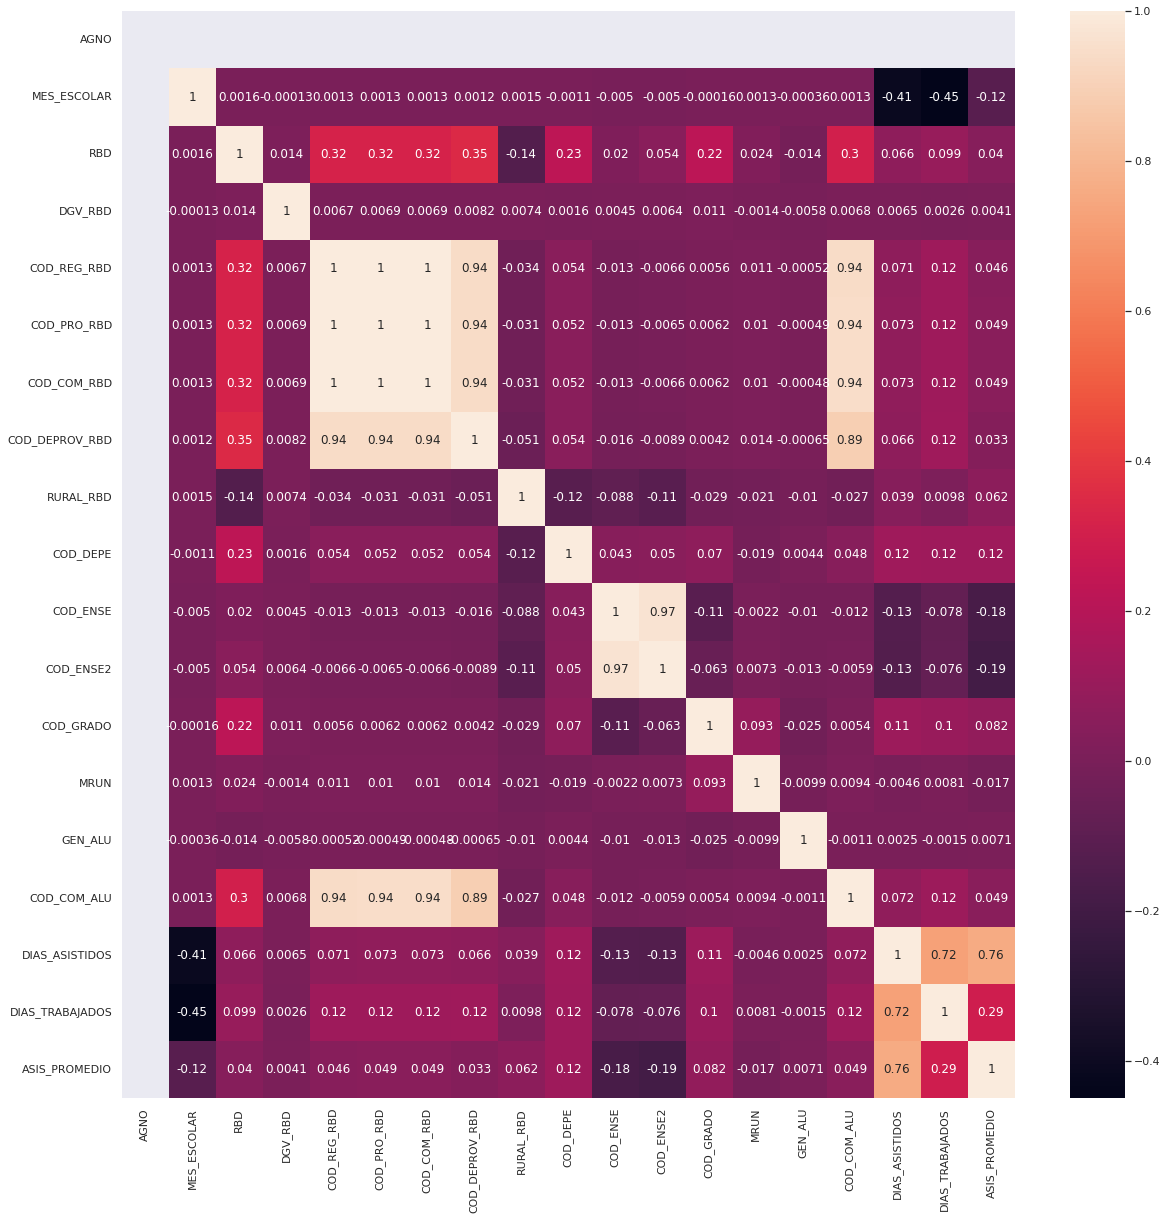

In [7]:
sns.set(rc={'figure.figsize':(20, 20)})
sns.heatmap(df.corr(), annot=True)

# Generacion de diagrama de violin

Este diagrama, nos dara una idea de donde se concentran los datos de la asistencia promedio de los alumos para el año 2019 (que corresponde a nuestro caso de estudio). Podemos ver que la asistencia de los alumnos esta bastante orientada a quienes tienen una asistencia regular (aproximadamente > 70%) y quienes tienen asistencia poca o casi nula (de 0 a 5% aproximadamente)

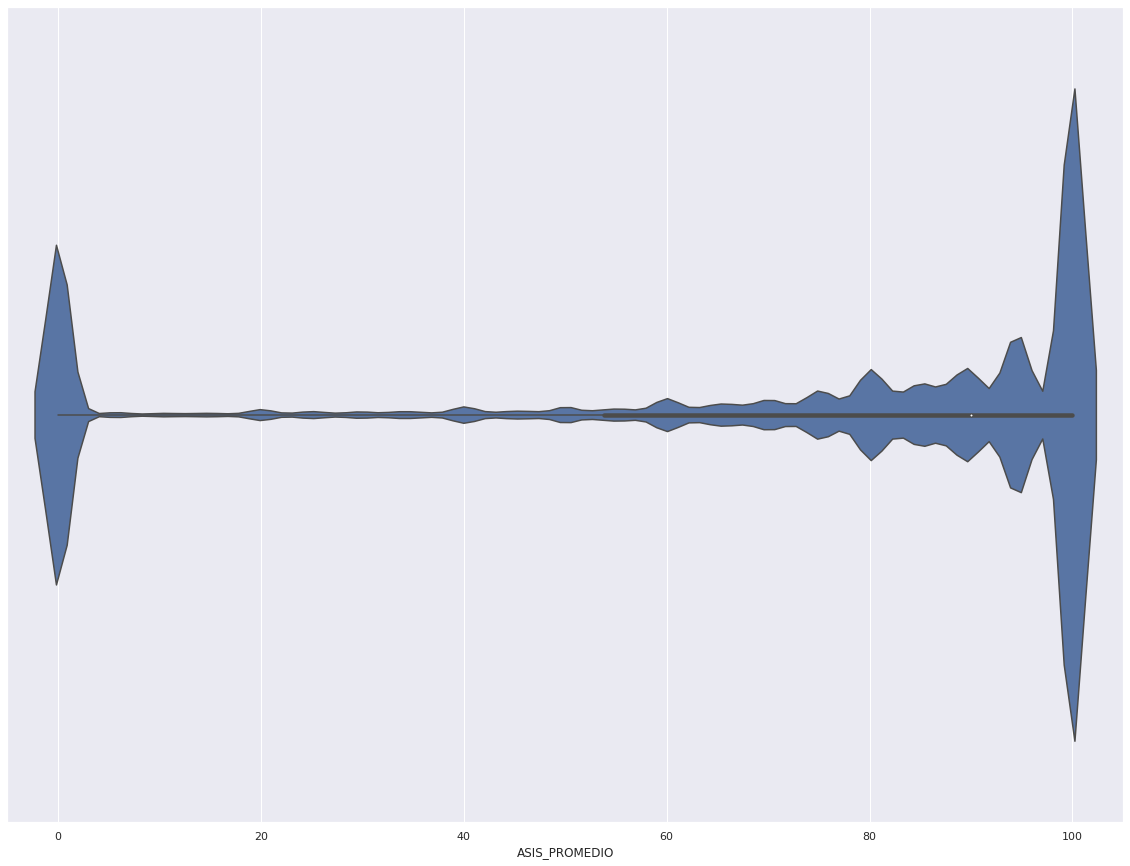

In [9]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20, 15)})
ax = sns.violinplot(data=df, x='ASIS_PROMEDIO', inner='box', orient='h')
ax.axes.set_xlim(-5, 105);

# Generacion de histograma

Al igual que el diagrama de violin, este diagrama nos brinda una idea de donde se concentran los datos de la asistencia promedio de los alumos para el año 2019. La diferencia radica en que aca podemos dividir el histograma en 20 partes para verificar de mejor forma la distribucion de la variable ```ASIS_PROMEDIO```

array([[<AxesSubplot:title={'center':'ASIS_PROMEDIO'}>]], dtype=object)

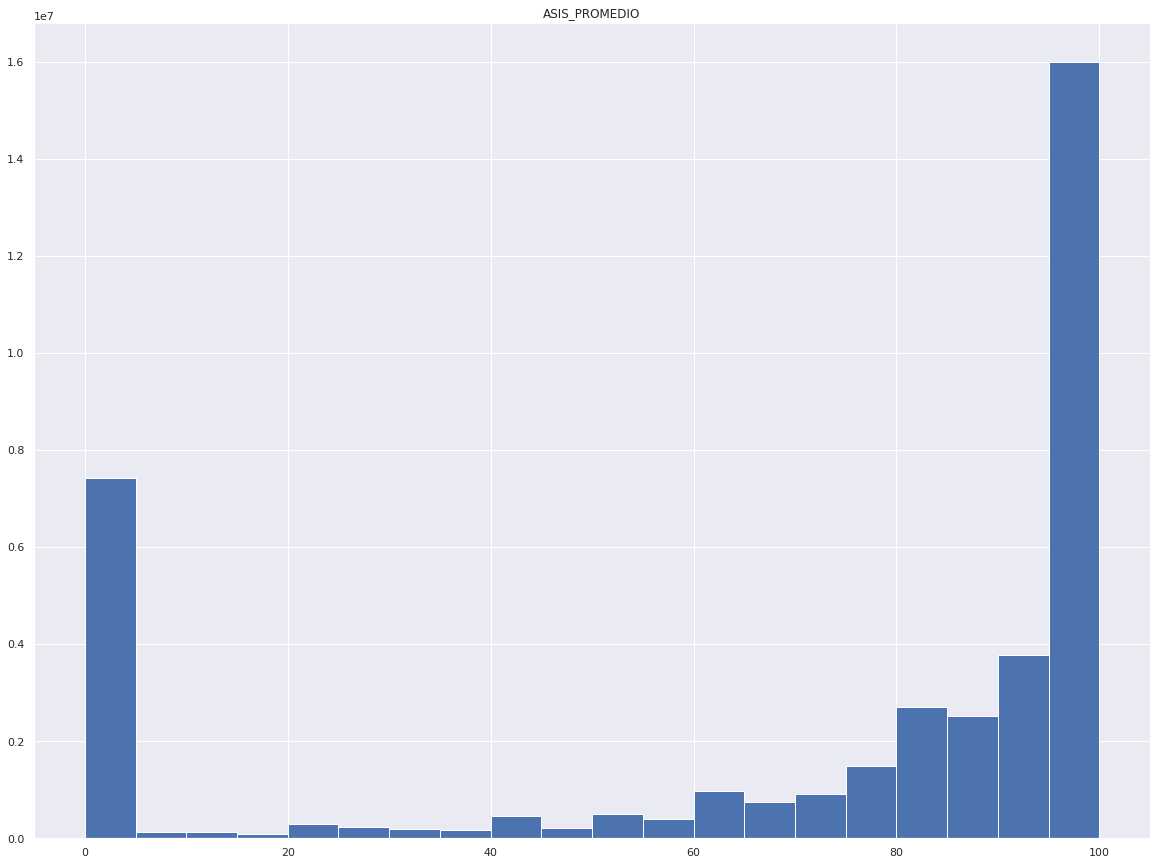

In [10]:
df.hist(column='ASIS_PROMEDIO', bins = 20)

# Diagrama de violin ```ASIS_PROMEDIO```

Este diagrama, nos dara una idea de donde se concentran los datos de la asistencia promedio de los alumos para el año 2019 (que corresponde a nuestro caso de estudio). La diferencia entre este diagrama de violin con el primero, se esta separando la asistencia promedio mayor-igual a 85% (ya que por disposicion ministerial, es la asistencia minima para aprobar o reprobar años de estudio)


(-10.0, 110.0)

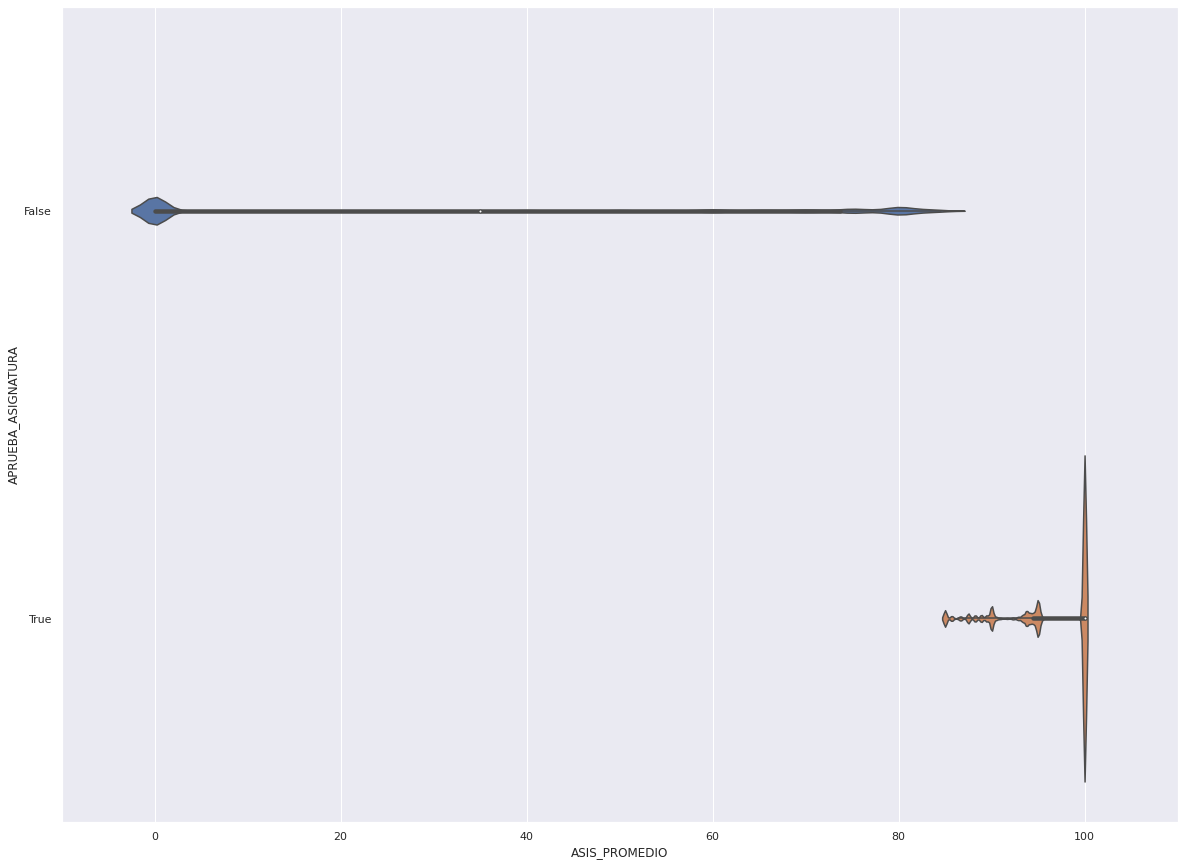

In [11]:
df['APRUEBA_ASIGNATURA'] = df['ASIS_PROMEDIO'] >=85
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20, 15)})
ax = sns.violinplot(data=df, x='ASIS_PROMEDIO', y='APRUEBA_ASIGNATURA', inner='box', orient='h')
ax.set_xlim(-10, 110)

# Diagrama de violin ```ASIS_PROMEDIO``` reprueban curso

Este diagrama, nos dara una idea de donde se concentran los datos de la asistencia promedio de los alumos para el año 2019 (que corresponde a nuestro caso de estudio) en este caso de quienes reprueban de curso por asistencia menor a 85%. Se puede observar que la principal curva cercana a 0, es mayor a los estudiantes que si tienen asistencia mayor a 10%. Esto podria ser generado por estudiantes que fueron inscritos a un curso, pero no han sido registrados. La curva mas cercana a la derecha, podria ser debido a estudiantes que tienen la percepcion de asistencia correcta y se fian de aprobar el curso de cualquier forma


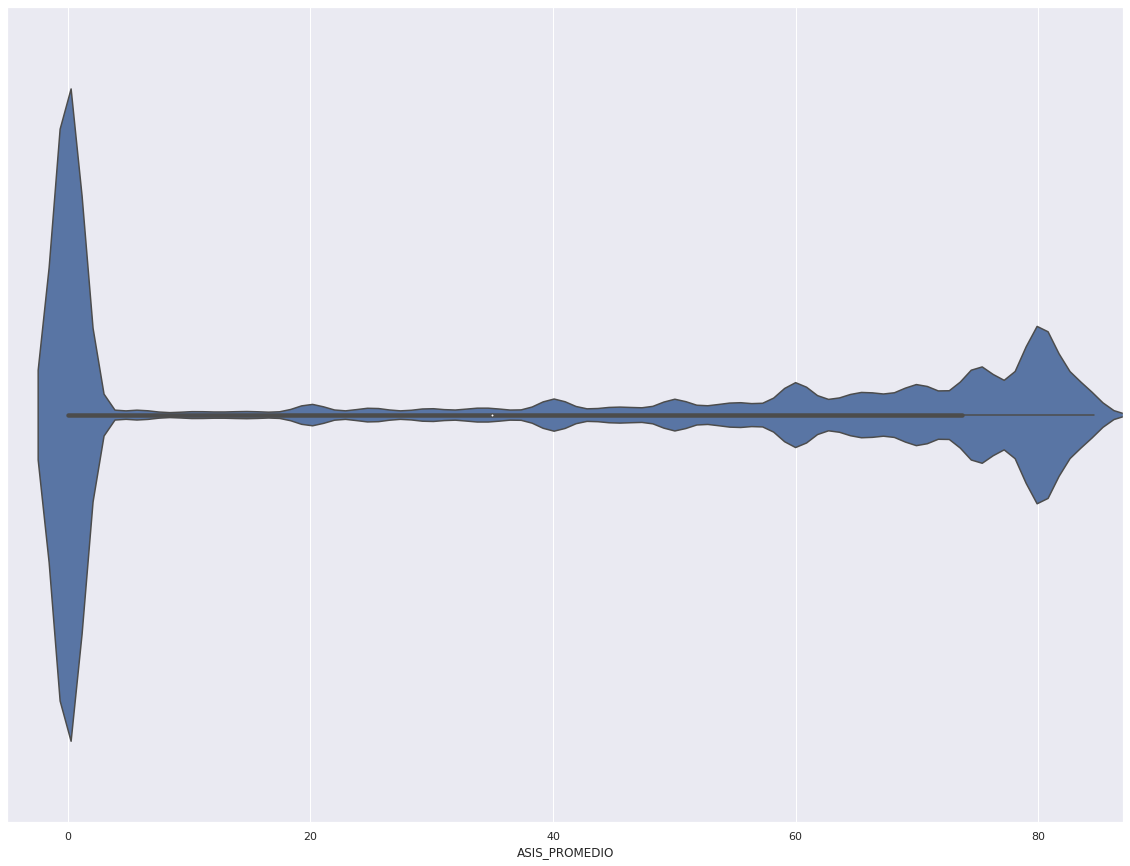

In [12]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20, 15)})
ax = sns.violinplot(data=df[df['APRUEBA_ASIGNATURA'] == False], x='ASIS_PROMEDIO', inner='box', orient='h')
ax.axes.set_xlim(-5, 87);

# Diagrama de violin ```ASIS_PROMEDIO``` aprueban curso

Este diagrama, nos dara una idea de donde se concentran los datos de la asistencia promedio de los alumos para el año 2019 (que corresponde a nuestro caso de estudio) en este caso de quienes aprueban de curso por asistencia mayor-igual a 85%. Se puede observar que la principal curva diagramada en torno a 97%, esto uede explicarse por la responzabilida de la mayoria de los estudiantes con sus estudios.


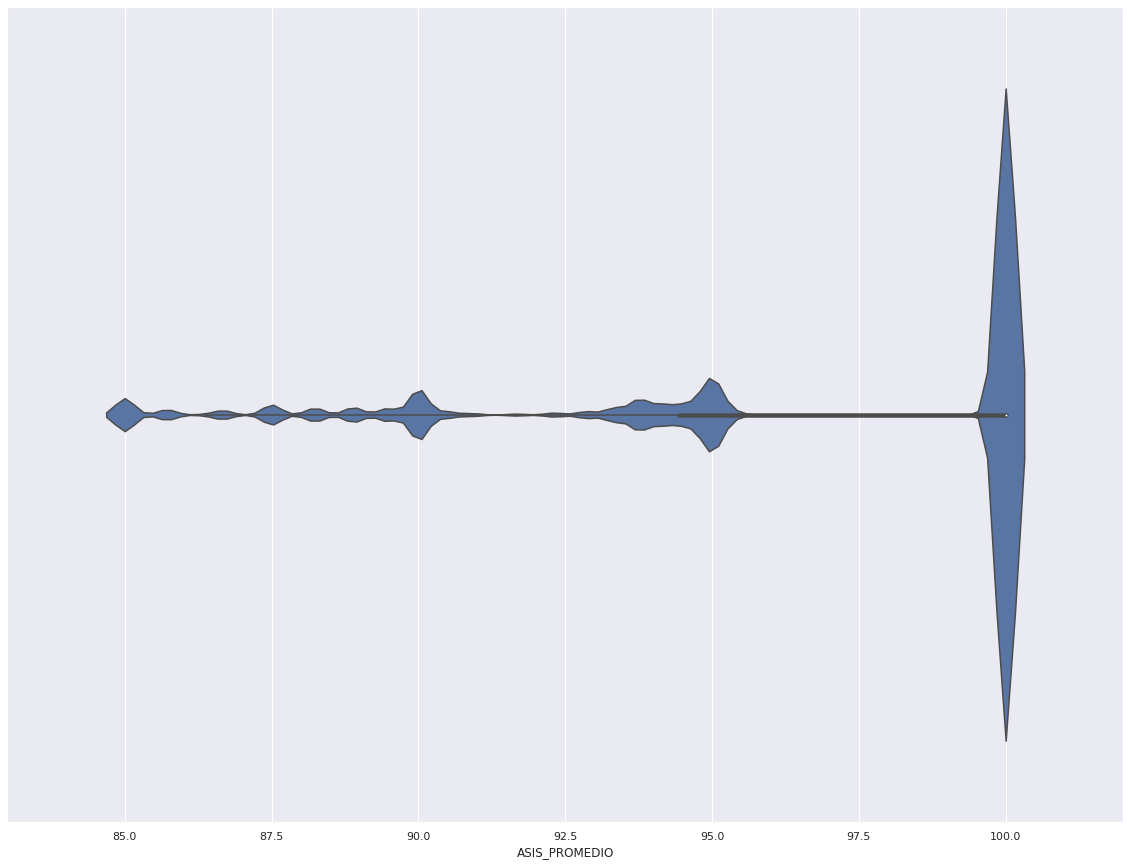

In [13]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20, 15)})
ax = sns.violinplot(data=df[df['APRUEBA_ASIGNATURA'] == True], x='ASIS_PROMEDIO', inner='box', orient='h')
ax.axes.set_xlim(83, 102);

# Analisis exploratorio basado en vista ```v_asistencia_comuna```

La vista ```v_asistencia_comuna``` proporciona agruapcion por comuna, de esta forma se puede obtener datos agregados respecto a promedio asistencia, desviacion estandar de asistencia y conteo de los registros agrupados en cada proyeccion.

In [14]:
%%bigquery df_v_asistencia_comuna
SELECT 
  COMUNA, 
  LATITUD_COMUNA,
  LONGITUD_COMUNA,
  PROMEDIO_ASISTENCIA,
  DESV_STD_ASISTENCIA,
  COUNT_ASISTENCIA,
  TIPO_REGION
FROM 
  `infinite-lens-352300.data_chile.v_asistencia_comuna` 
ORDER BY
    COMUNA

Downloading: 100%|██████████| 345/345 [00:01<00:00, 309.47rows/s]


In [15]:
df_v_asistencia_comuna.head()

,COMUNA,LATITUD_COMUNA,LONGITUD_COMUNA,PROMEDIO_ASISTENCIA,DESV_STD_ASISTENCIA,COUNT_ASISTENCIA,TIPO_REGION
0,ALGARROBO,"-33°22'09""","-71°40'05""",75.462903,33.793087,31496,CENTRO
1,ALHUÉ,"-34°1'588""","-71°5'60""",65.109601,32.913261,13726,CENTRO
2,ALTO BIOBÍO,"-38°37'84""","-71°19'276""",82.998231,31.483674,14613,SUR
3,ALTO DEL CARMEN,"-28°44'564""","-70°29'276""",75.432138,36.262613,10193,NORTE
4,ALTO HOSPICIO,"-20°15'252""","-70°1'192""",52.989292,44.814102,368510,NORTE


# Geodataframe desde Dataframe

Se crea geodataframe a partir de dataframe obtenido desde ```df_v_asistencia_comuna``` para la posterior creacion de columna con informacion geografica de las comunas

In [ ]:
gdf_v_asistencia_comuna = gpd.GeoDataFrame(df_v_asistencia_comuna, crs={'init': 'epsg:4326'})

In [17]:
gdf_comunas = gpd.read_file('division_comunal.shp')
gdf_comunas['COMUNA'] = gdf_comunas['NOM_COM'].apply(lambda x: x.upper())

In [18]:
gdf_v_asistencia_comuna[~gdf_v_asistencia_comuna["COMUNA"].isin(gdf_comunas["COMUNA"])]

,COMUNA,LATITUD_COMUNA,LONGITUD_COMUNA,PROMEDIO_ASISTENCIA,DESV_STD_ASISTENCIA,COUNT_ASISTENCIA,TIPO_REGION
155,LOS ÁLAMOS,"-37°37'156""","-73°27'216""",80.738253,34.492791,57920,SUR
156,LOS ÁNGELES,"-36°56'384""","-72°21'36""",76.619392,35.999632,545238,SUR
163,MARCHIHUE,"-34°23'60""","-71°37'588""",80.304122,30.524458,11190,CENTRO
168,MAULLIN,"-41°37'48""","-73°35'528""",74.447069,37.304695,25900,SUR
193,PAIGUANO,"-30°2'168""","-70°30'252""",64.257445,40.386256,10920,NORTE
325,TREHUACO,"-36°25'444""","-72°39'54""",87.589261,26.596702,7719,CENTRO
330,VICHUQUEN,"-34°49'228""","-72°2'6""",82.950272,26.958149,6701,CENTRO


In [19]:
gdf_comunas[~gdf_comunas["COMUNA"].isin(gdf_v_asistencia_comuna["COMUNA"])]

,NOM_REG,NOM_PROV,NOM_COM,SHAPE_LENG,DIS_ELEC,CIR_SENA,COD_COMUNA,SHAPE_Le_1,SHAPE_Area,geometry,COMUNA
23,Región de Los Lagos,Llanquihue,Maullín,310676.687900,57,17,1010,310676.687262,8.138924e+08,"MULTIPOLYGON (((112226.425 5383858.539, 112226...",MAULLÍN
75,Región del Libertador Bernardo O'Higgins,Cardenal Caro,Marchigüe,170038.624165,35,9,6204,170038.623784,6.586934e+08,"POLYGON ((241952.062 6211313.004, 242028.141 6...",MARCHIGÜE
97,Región de Coquimbo,Elqui,Paihuano,209582.274942,7,4,4105,209582.273978,1.497142e+09,"POLYGON ((359681.752 6684165.501, 359790.280 6...",PAIHUANO
171,Región del Bío-Bío,Ñuble,Treguaco,121960.930042,42,12,8420,121960.930415,3.156355e+08,"POLYGON ((171409.095 5973267.975, 171425.635 5...",TREGUACO
199,Región del Maule,Curicó,Vichuquén,119601.435685,36,10,7309,119601.435425,4.515873e+08,"POLYGON ((221986.708 6157530.443, 222007.926 6...",VICHUQUÉN
241,Zona sin demarcar,Zona sin demarcar,Zona sin demarcar,0.000000,0,0,0,252805.153672,3.937432e+09,"POLYGON ((161742.674 4543513.058, 217703.370 4...",ZONA SIN DEMARCAR
281,Región del Bío-Bío,Arauco,Los Alamos,191513.658139,46,13,8206,191513.657109,6.025204e+08,"POLYGON ((109217.504 5835496.934, 109284.392 5...",LOS ALAMOS
287,Región del Bío-Bío,Bío-Bío,Los Angeles,257441.723986,47,13,8301,257441.724720,1.752319e+09,"POLYGON ((223166.340 5880718.388, 223241.051 5...",LOS ANGELES


# Limpieza de columna ```COMUNA```

se reemplazan algunos nombres que estan escritos de manera diferente en geodataframe ```gdf_comunas``` para posterior merge/join entre las columnas de comunas para obtener ```shape```de informacion geografica de comunas para que sean diagramadas en el mapa de Chile

In [20]:
gdf_comunas['COMUNA'] = gdf_comunas['COMUNA'].str.replace('MAULLÍN','MAULLIN')
gdf_comunas['COMUNA'] = gdf_comunas['COMUNA'].str.replace('MARCHIGÜE','MARCHIHUE')
gdf_comunas['COMUNA'] = gdf_comunas['COMUNA'].str.replace('PAIHUANO','PAIGUANO')
gdf_comunas['COMUNA'] = gdf_comunas['COMUNA'].str.replace('TREGUACO','TREHUACO')
gdf_comunas['COMUNA'] = gdf_comunas['COMUNA'].str.replace('VICHUQUÉN','VICHUQUEN')
gdf_comunas['COMUNA'] = gdf_comunas['COMUNA'].str.replace('LOS ALAMOS','LOS ÁLAMOS')
gdf_comunas['COMUNA'] = gdf_comunas['COMUNA'].str.replace('LOS ANGELES','LOS ÁNGELES')

In [21]:
gdf_v_asistencia_comuna[~gdf_v_asistencia_comuna["COMUNA"].isin(gdf_comunas["COMUNA"])]

,COMUNA,LATITUD_COMUNA,LONGITUD_COMUNA,PROMEDIO_ASISTENCIA,DESV_STD_ASISTENCIA,COUNT_ASISTENCIA,TIPO_REGION


In [22]:
gdf_comunas[~gdf_comunas["COMUNA"].isin(gdf_v_asistencia_comuna["COMUNA"])]

,NOM_REG,NOM_PROV,NOM_COM,SHAPE_LENG,DIS_ELEC,CIR_SENA,COD_COMUNA,SHAPE_Le_1,SHAPE_Area,geometry,COMUNA
241,Zona sin demarcar,Zona sin demarcar,Zona sin demarcar,0.0,0,0,0,252805.153672,3.937432e+09,"POLYGON ((161742.674 4543513.058, 217703.370 4...",ZONA SIN DEMARCAR


In [23]:
gdf_aux = gdf_v_asistencia_comuna.merge(gdf_comunas, on= 'COMUNA')

In [24]:
'''
Funcion que genera el diagrama de un mapa de coropletas en base a un geodataframe

- df: geodataframe con informacion geografica de tipo ```shapes```
- figsize: coordenadas x,y de la figura a diagramar
- legend: definira si es que el mapa implementara o no la marca de comparacion de valores en un mapa de coropletas
- shrink: tamaño de la legend

'''
def plot_map(df, figsize = (10, 40), legend= False, shrink = 1):
    
    #white, dark, whitegrid, darkgrid, ticks
    sns.set_style('darkgrid')
    df.plot(
        column='PROMEDIO_ASISTENCIA',
        cmap='RdPu',
        linewidth=0.9,
        #ax=ax,
        edgecolor='1',
        legend=legend, 
        legend_kwds={
            'shrink': shrink
        },
        missing_kwds={
            "color": "lightgrey",
            "label": "Missing values",
        }, 
        figsize=figsize,
        aspect=1)

# Mapa de Chile tipo coropletas

El siguente mapa, diagrama a Chile con sus divisiones comunales, obteniendo como resultado en colo mas oscuro los lugares en donde hay mayor promedio de asistencia en los estudiantes. Se decide dejar fuera a Isla de Pascua y al Archipielago de Juan Fernandez, debido al espacio del diagrama. Se decide diagramar con mapa de coropletas, para dar una mejor idea de los datos dentro del geodataframe ```gdf_v_asistencia_comuna``` en lo que a promedio de asistencia se refiere

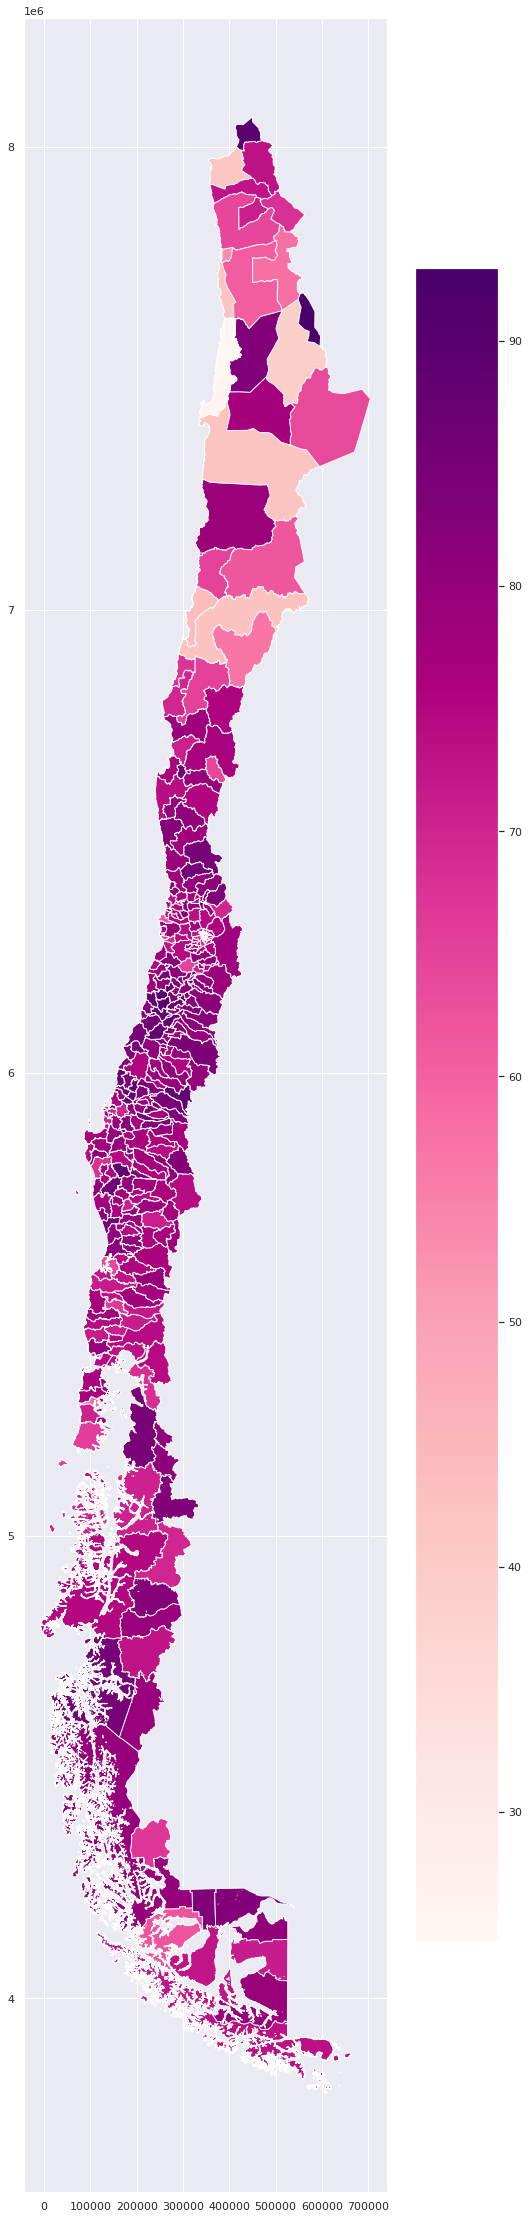

In [25]:
gdf_aux_chile_continental = gdf_aux[
    (
        (gdf_aux['COMUNA'] != 'ISLA DE PASCUA') &
        (gdf_aux['COMUNA'] != 'JUAN FERNÁNDEZ') 
    )
]
plot_map(gdf_aux_chile_continental, legend= True)

# Mapa de Chile tipo coropletas zona norte, centro y sur

El siguente mapa, diagrama a Chile con sus divisiones comunales en la zona norte, centro y sur, para dar una idea de como son los datos de asistencia de estudiantes en cada zona geografica de nuestro pais. De esta forma, los promedios se tomaran con el filtro de la zona y seran comparados entre ese conjunto de datos para la visualizacion de mapa de coropletas. Se dejan fuera de estos mapa, las comunas de Isla de Pascua y del Archipielago de Juan Fernandez, debido al espacio del diagrama

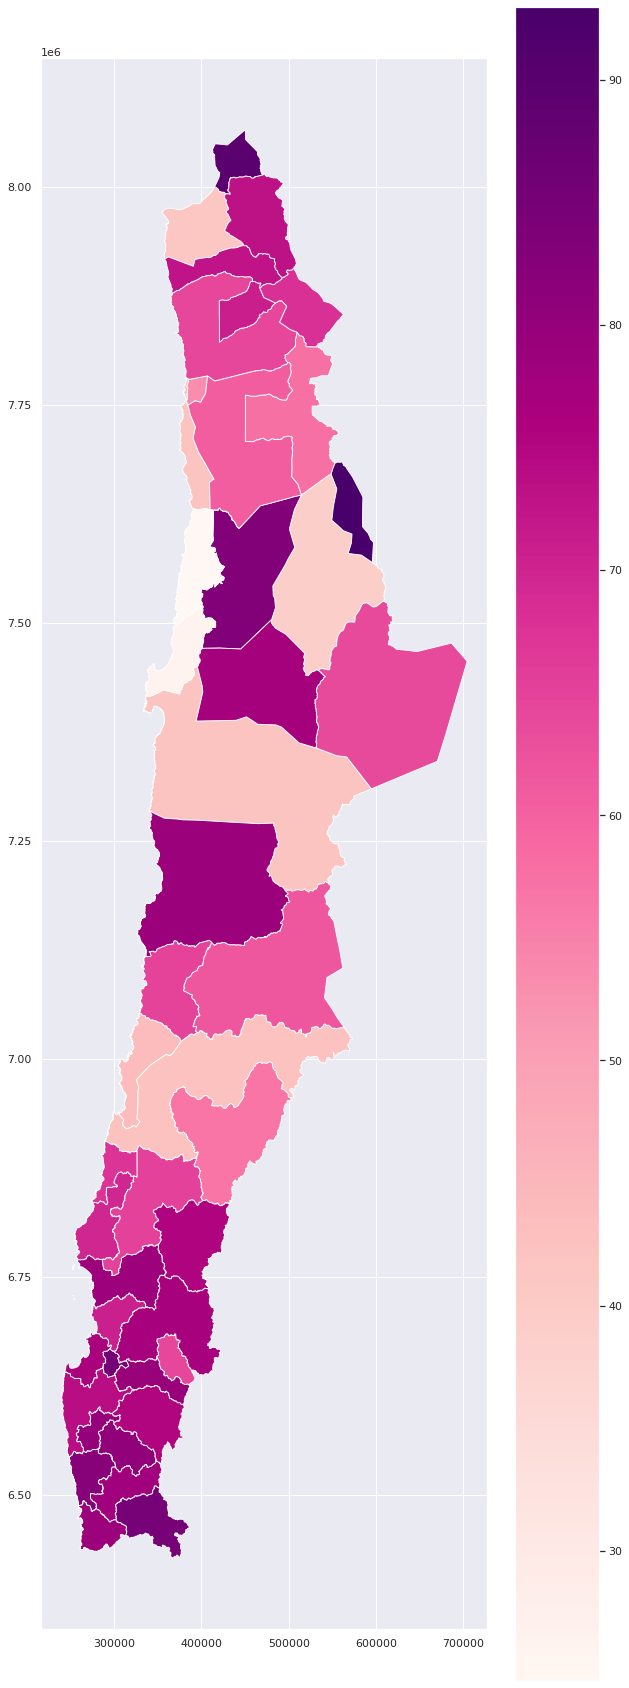

In [26]:
gdf_aux_chile_continental_norte = gdf_aux[
    (
        (gdf_aux['TIPO_REGION'] == 'NORTE') & 
        (
            (gdf_aux['COMUNA'] != 'ISLA DE PASCUA') &
            (gdf_aux['COMUNA'] != 'JUAN FERNÁNDEZ') 
        )
    )
]
plot_map(gdf_aux_chile_continental_norte, legend= True)

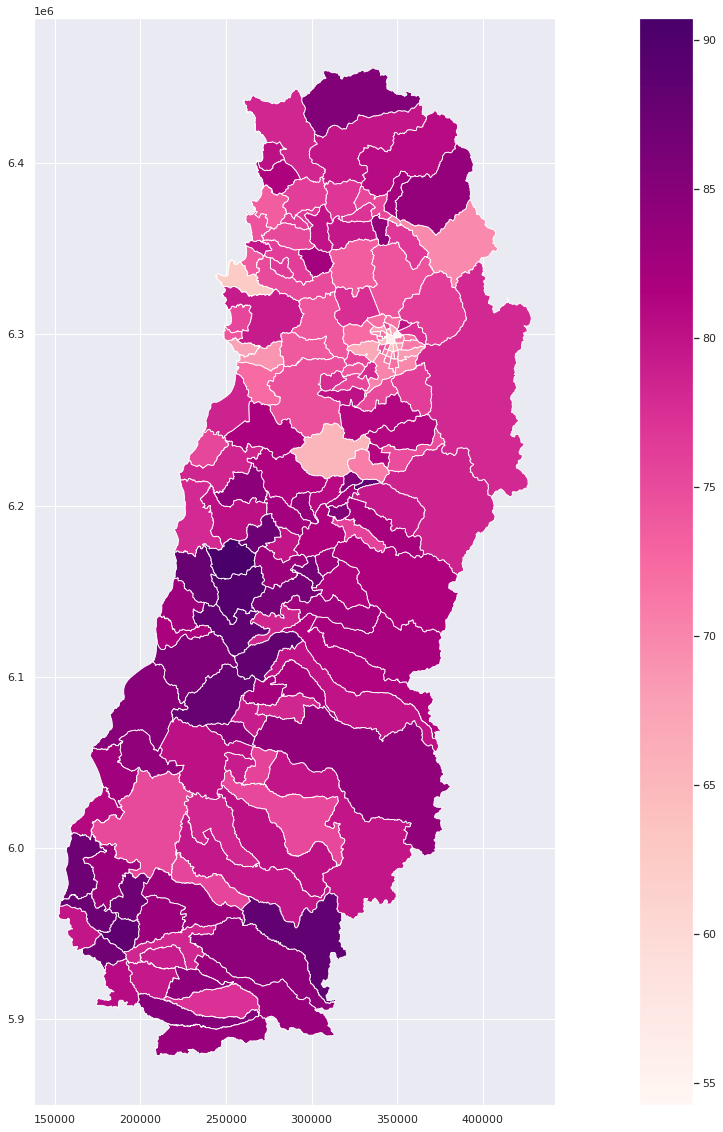

In [27]:
gdf_aux_chile_continental_centro = gdf_aux[
    (
        (gdf_aux['TIPO_REGION'] == 'CENTRO') & 
        (
            (gdf_aux['COMUNA'] != 'ISLA DE PASCUA') &
            (gdf_aux['COMUNA'] != 'JUAN FERNÁNDEZ') 
        )
    )
]
plot_map(gdf_aux_chile_continental_centro, figsize = (30, 20),legend= True)

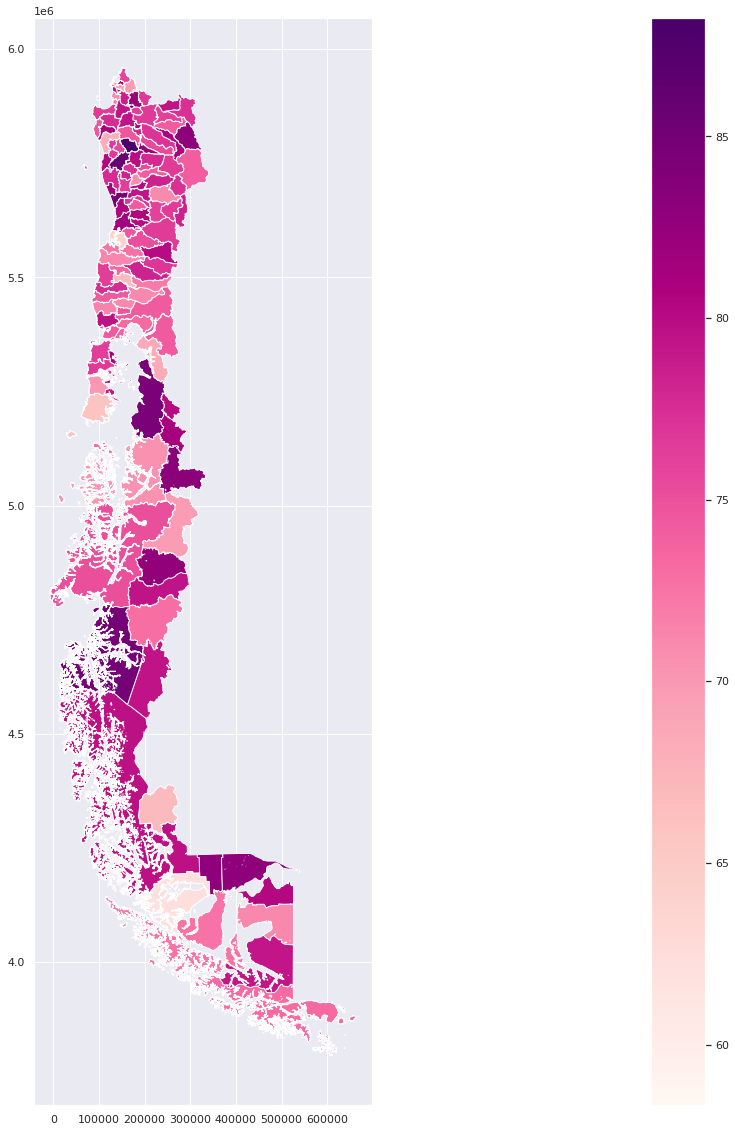

In [28]:
gdf_aux_chile_continental_sur = gdf_aux[
    (
        (gdf_aux['TIPO_REGION'] == 'SUR') & 
        (
            (gdf_aux['COMUNA'] != 'ISLA DE PASCUA') &
            (gdf_aux['COMUNA'] != 'JUAN FERNÁNDEZ') 
        )
    )
]
plot_map(gdf_aux_chile_continental_sur, figsize = (100, 20),legend= True)


# Mapa de Chile tipo coropletas Region Metropolitana

El siguente mapa, diagrama a la Region metropolitana con sus divisiones comunales, para dar una idea de como son los datos de asistencia de estudiantes en cada comuna en la capital de nuestro pais. De esta forma, los promedios se tomaran con el filtro de la zona y seran comparados entre ese conjunto de datos para la visualizacion de mapa de coropletas. Las comunas que tienen mejor asistencia promedio en general, son San Pedro, Paine, Vitacura, Isla de Maipo. Las comunas que tienen peor promedio de asistencia son, Providencia, Santiago centro y con ello muchas de las comunas mas centricas de la capital de nuestro pais.

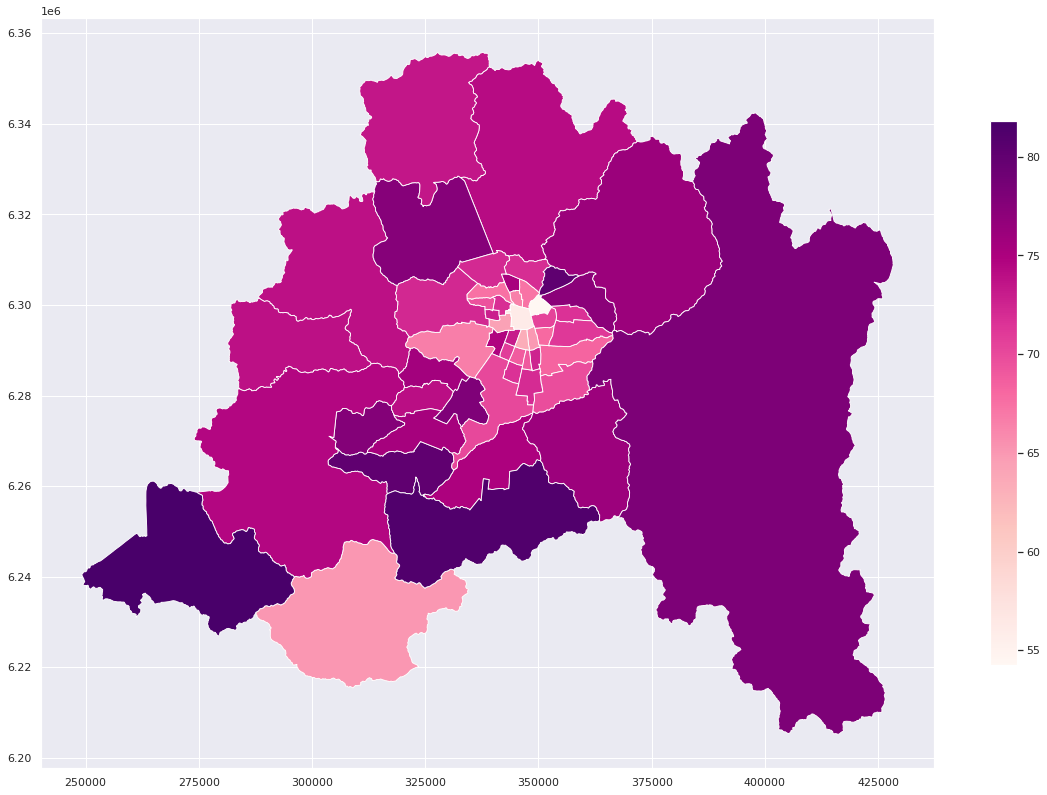

In [31]:
gdf_aux_chile_reg_met = gdf_aux[
    (gdf_aux['NOM_REG'] == 'Región Metropolitana de Santiago') 
]
gdf_aux_chile_reg_met
plot_map(gdf_aux_chile_reg_met, figsize = (20, 100), legend= True, shrink = 0.1)